# INTC-AMD-NVDA Equity Analysis

A comprehensive five-year quantitative analysis of the stocks of Intel Corporation (Ticker: INTC), Advanced Micro Devices (AMD) & Nvidia (NVDA) 

Time-period: 27/05/2014 - 24/05/2019


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import math
from math import sqrt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
from pandas_datareader import data as wb
from pandas import Series, DataFrame
from scipy.stats import norm

In [2]:
tickers = ['INTC', 'AMD', 'NVDA']
data = pd.DataFrame()
for s in tickers:
    data[s] = wb.DataReader(s, data_source = 'iex', start = '2014-05-25')['close']

5y
5y
5y


In [3]:
#data_df = DataFrame(data)

In [4]:
#data_df.to_excel('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 14 - Markowitz Portfolio/C:\Users\Naois\Documents\Udemy Resources\Python - Finance\Section 14 - Markowitz Portfolio/INTC_AMD_NVDA_Data.xlsx')

In [5]:
data = pd.read_excel('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 14 - Markowitz Portfolio/INTC-AMD-NVDA 5Y Analysis/INTC_AMD_NVDA_SP500_Data.xlsx', index_col = 'Date', parse_dates = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-05-27 to 2019-05-24
Data columns (total 4 columns):
INTC      1259 non-null float64
AMD       1259 non-null float64
NVDA      1259 non-null float64
S&P500    1258 non-null float64
dtypes: float64(4)
memory usage: 49.2 KB


In [7]:
data.head(2)

INTC   AMD     NVDA       S&P500
Date                                           
2014-05-27  23.2108  4.04  18.0403  1911.910034
2014-05-28  23.3585  4.00  18.1936  1909.780029

In [8]:
data.tail(2)

INTC    AMD    NVDA      S&P500
Date                                        
2019-05-23  44.53  26.36  147.32  2822.23999
2019-05-24  44.57  26.44  145.15  2826.06000

---------------------------------------------------------------------------------------------------------------------------------

# Normalised Stock Returns 
> Normalised by a factor of 100

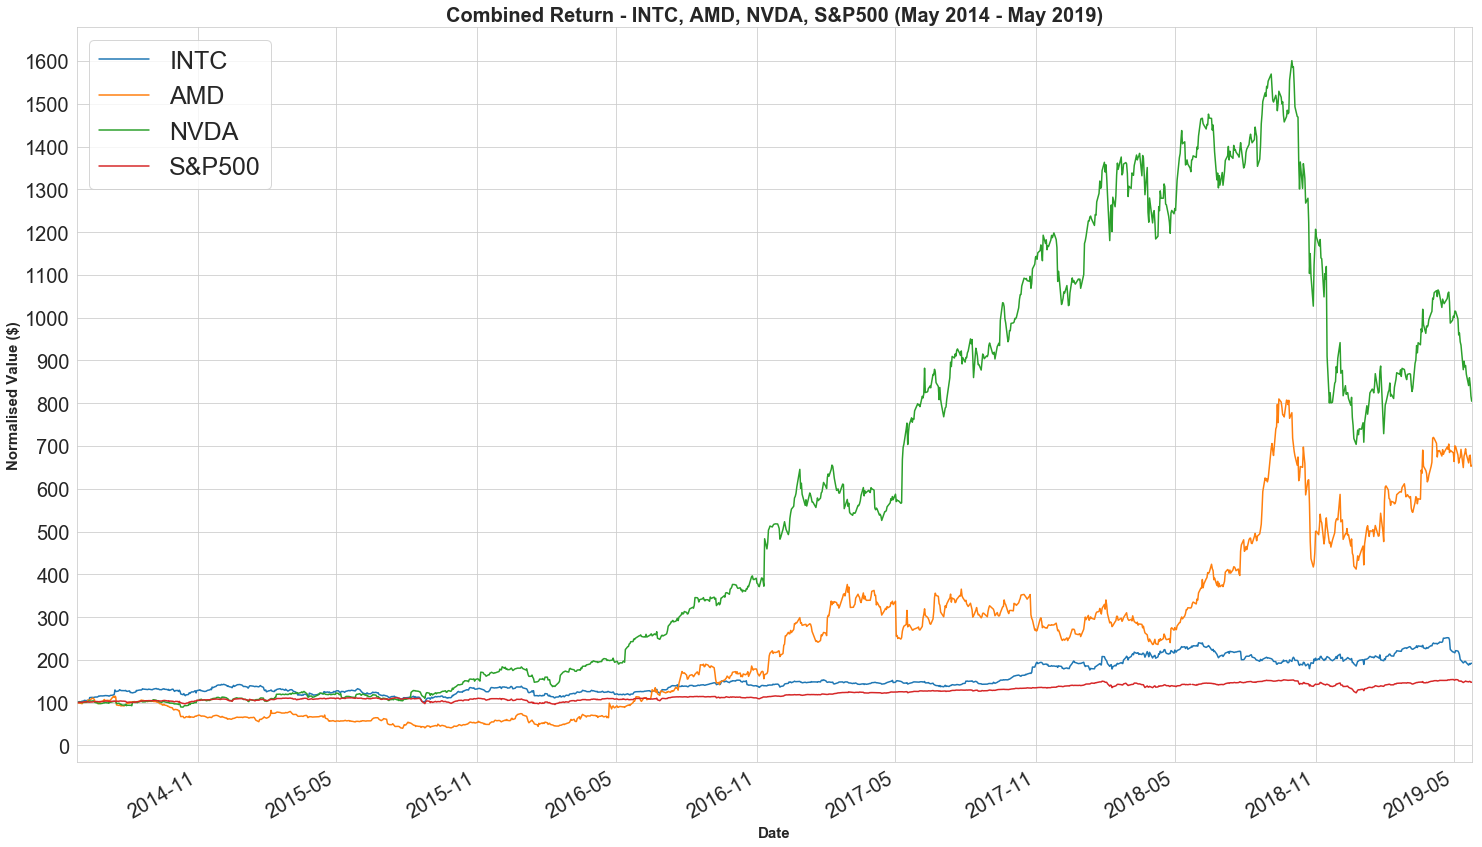

In [97]:
(data/data.iloc[0]*100).plot(legend = True, figsize = (25,15), fontsize = 20)
plt.legend(prop={'size': 25})
plt.title('Combined Return - INTC, AMD, NVDA, S&P500 (May 2014 - May 2019)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Normalised Value ($)', fontsize = 15, weight = 'bold')
plt.yticks(np.arange(0, 1700, step = 100))
plt.margins(x = 0)
#plt.savefig('Combined Return Plot.pdf')
plt.show()

In [10]:
rets = np.log(data/data.shift(1))
returns = (rets)*100
returns.head()

INTC       AMD      NVDA    S&P500
Date                                              
2014-05-27       NaN       NaN       NaN       NaN
2014-05-28  0.634326 -0.995033  0.846174 -0.111469
2014-05-29  0.297521  0.747201 -0.157872  0.535276
2014-05-30  1.326314 -0.747201  0.263348  0.184198
2014-06-02 -0.219694 -0.752827 -0.316211  0.072756

---------------------------------------------------------------------------------------------------------------------------------

# Daily Stock Returns

In [11]:
#Daily Returns
id = returns['INTC'].mean()
ad = returns['AMD'].mean()
nd = returns['NVDA'].mean()
sd = returns['S&P500'].mean()

In [12]:
print('Average Daily Return of INTC since May 2014: ' + str(round(id, 2))+ '%')
print('Average Daily Return of AMD since May 2014: ' + str(round(ad, 2))+ '%')
print('Average Daily Return of NVDA since May 2014: ' + str(round(nd, 2))+ '%')
print('Average Daily Return of S&P500 since May 2014: ' + str(round(sd, 2))+ '%')

Average Daily Return of INTC since May 2014: 0.05%
Average Daily Return of AMD since May 2014: 0.15%
Average Daily Return of NVDA since May 2014: 0.17%
Average Daily Return of S&P500 since May 2014: 0.03%


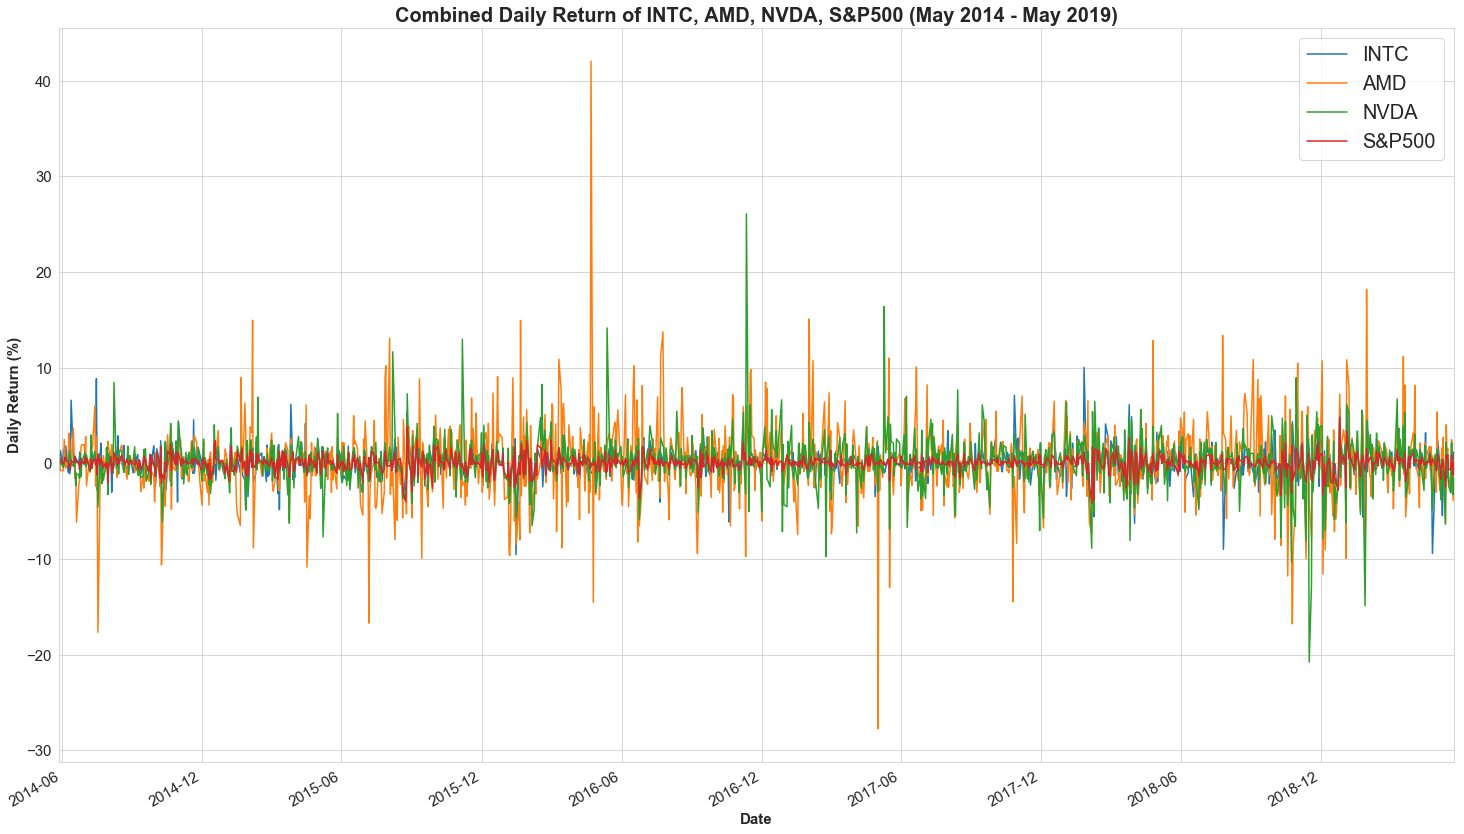

In [96]:
returns.plot(legend = True, figsize = (25,15), fontsize = 15)
plt.legend(prop={'size': 20})
plt.title('Combined Daily Return of INTC, AMD, NVDA, S&P500 (May 2014 - May 2019)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
#plt.savefig('Combined Daily Return Plot.pdf')
plt.show()

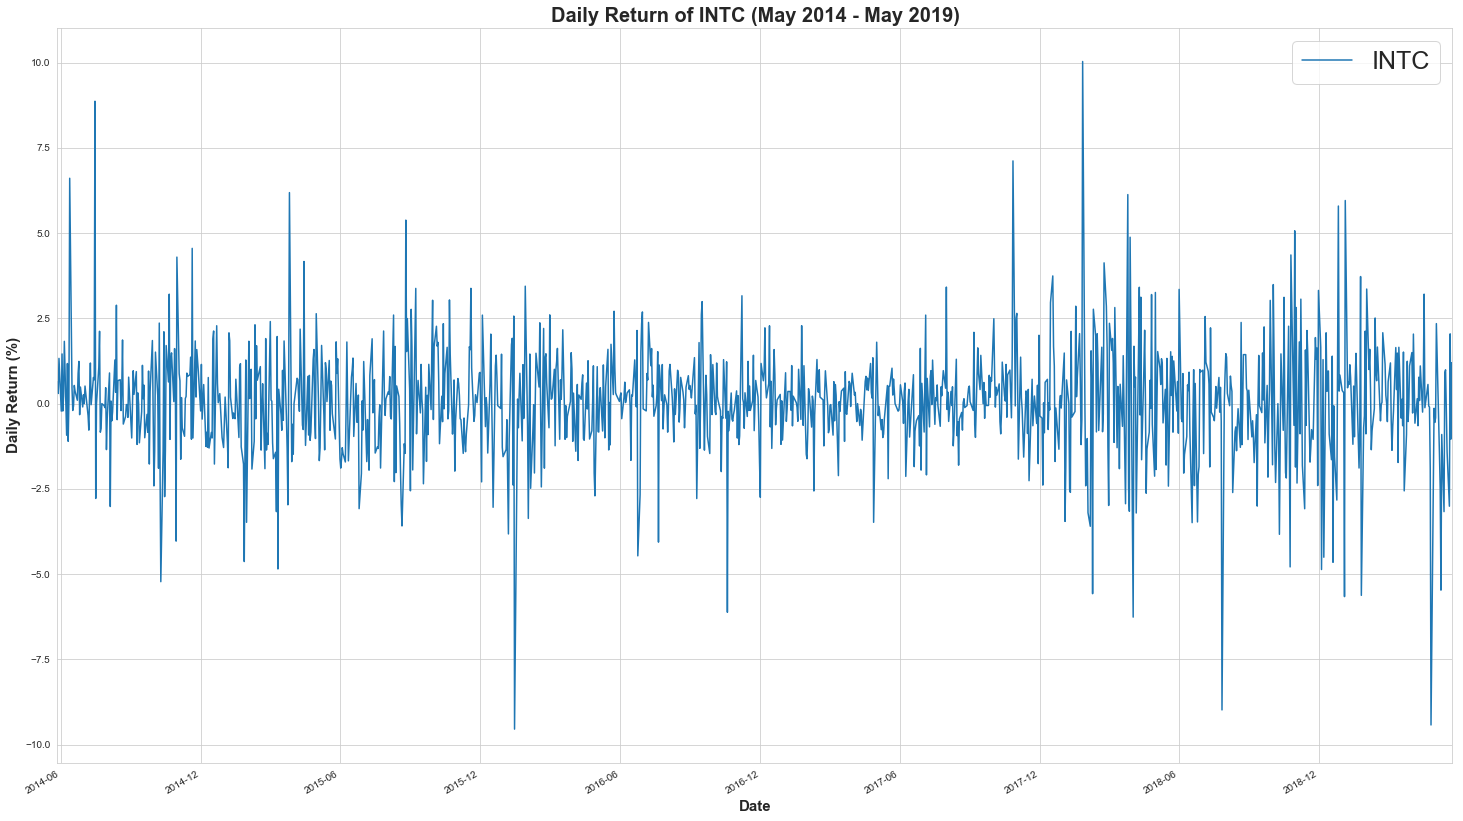

In [95]:
returns['INTC'].plot(legend = True, figsize = (25,15))
plt.legend(prop={'size': 25})
plt.title('Daily Return of INTC (May 2014 - May 2019)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
#plt.savefig('Daily Return - INTC.pdf')
plt.show()

No handles with labels found to put in legend.


<Figure size 1080x1080 with 0 Axes>

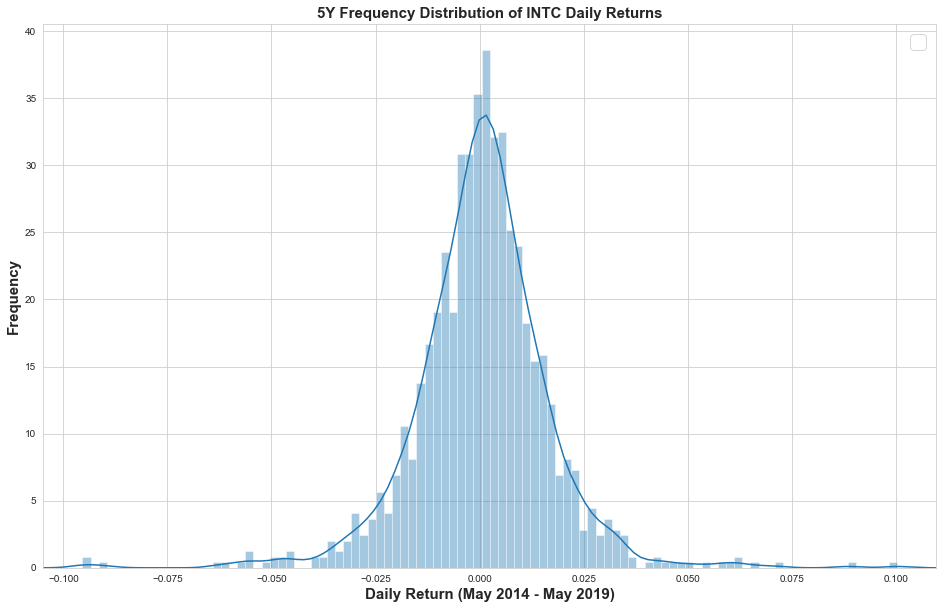

<Figure size 1080x1080 with 0 Axes>

In [15]:
sns.distplot(rets['INTC'].dropna(), bins = 100)
plt.legend(prop={'size': 20})
plt.title('5Y Frequency Distribution of INTC Daily Returns', fontsize = 15, weight = 'bold')
plt.xlabel('Daily Return (May 2014 - May 2019)', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.margins(x = 0)
#plt.savefig('INTC Frequency Distribution Plot.pdf')
plt.figure(figsize = (15,15))

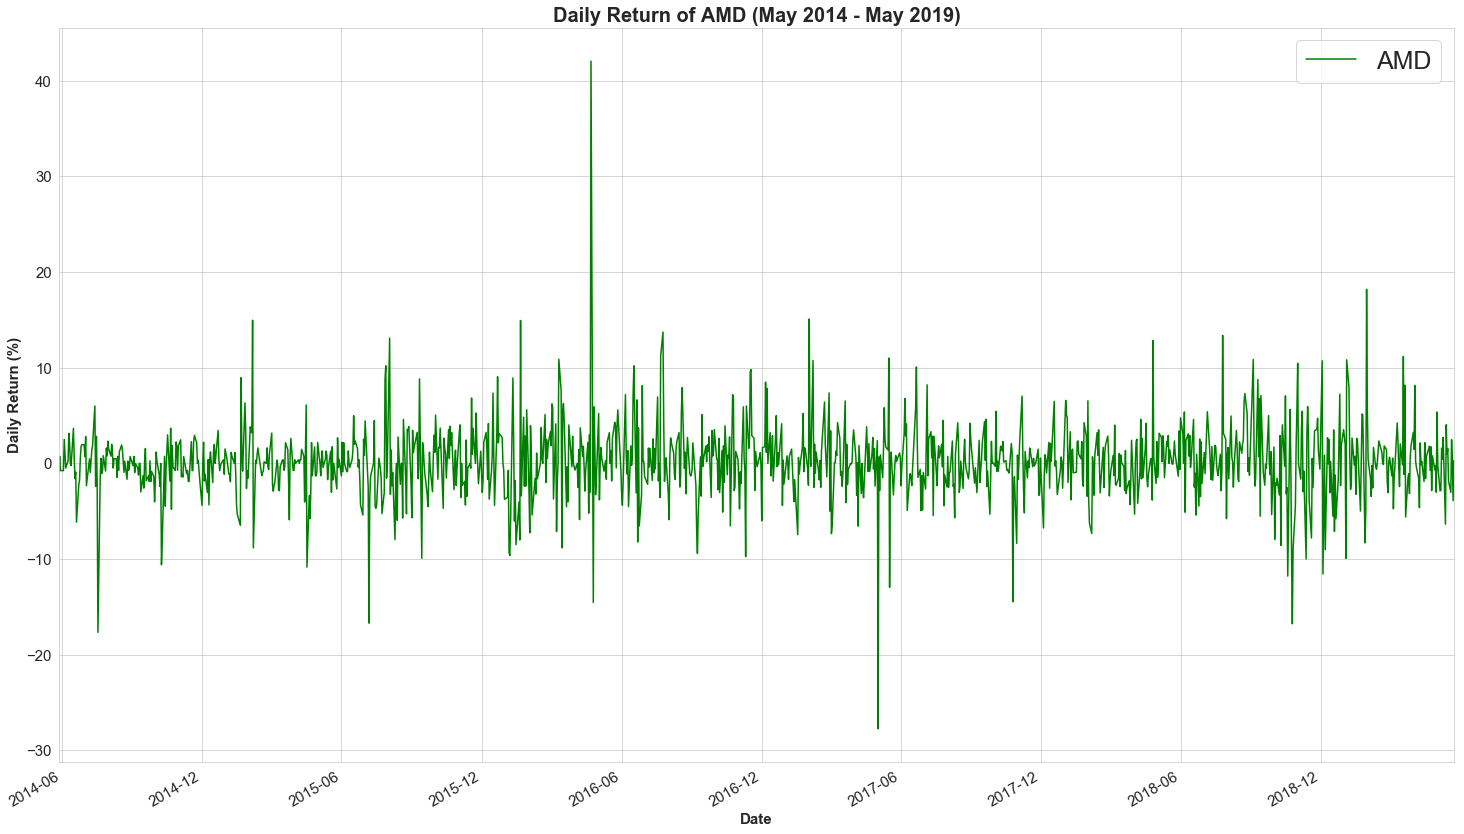

In [93]:
returns['AMD'].plot(legend = True, figsize = (25,15), color = 'g', fontsize = 15)
plt.legend(prop={'size': 25})
plt.title('Daily Return of AMD (May 2014 - May 2019)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
#plt.savefig('Daily Return - AMD.pdf')
plt.show()

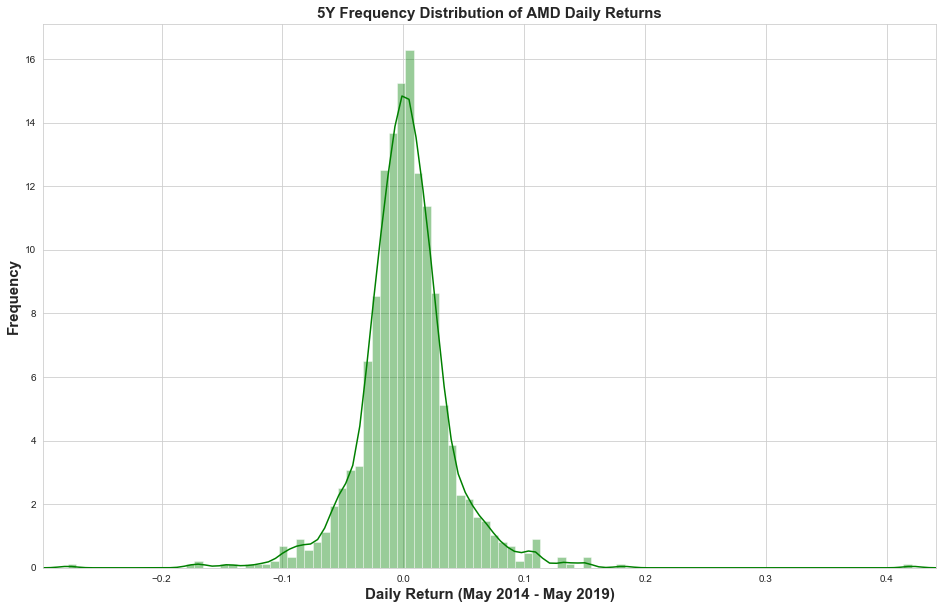

In [17]:
sns.distplot(rets['AMD'].dropna(), bins = 100, color = 'g')
plt.title('5Y Frequency Distribution of AMD Daily Returns', fontsize = 15, weight = 'bold')
plt.xlabel('Daily Return (May 2014 - May 2019)', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.margins(x = 0)
#plt.savefig('AMD Frequency Distribution Plot.pdf')
plt.show()

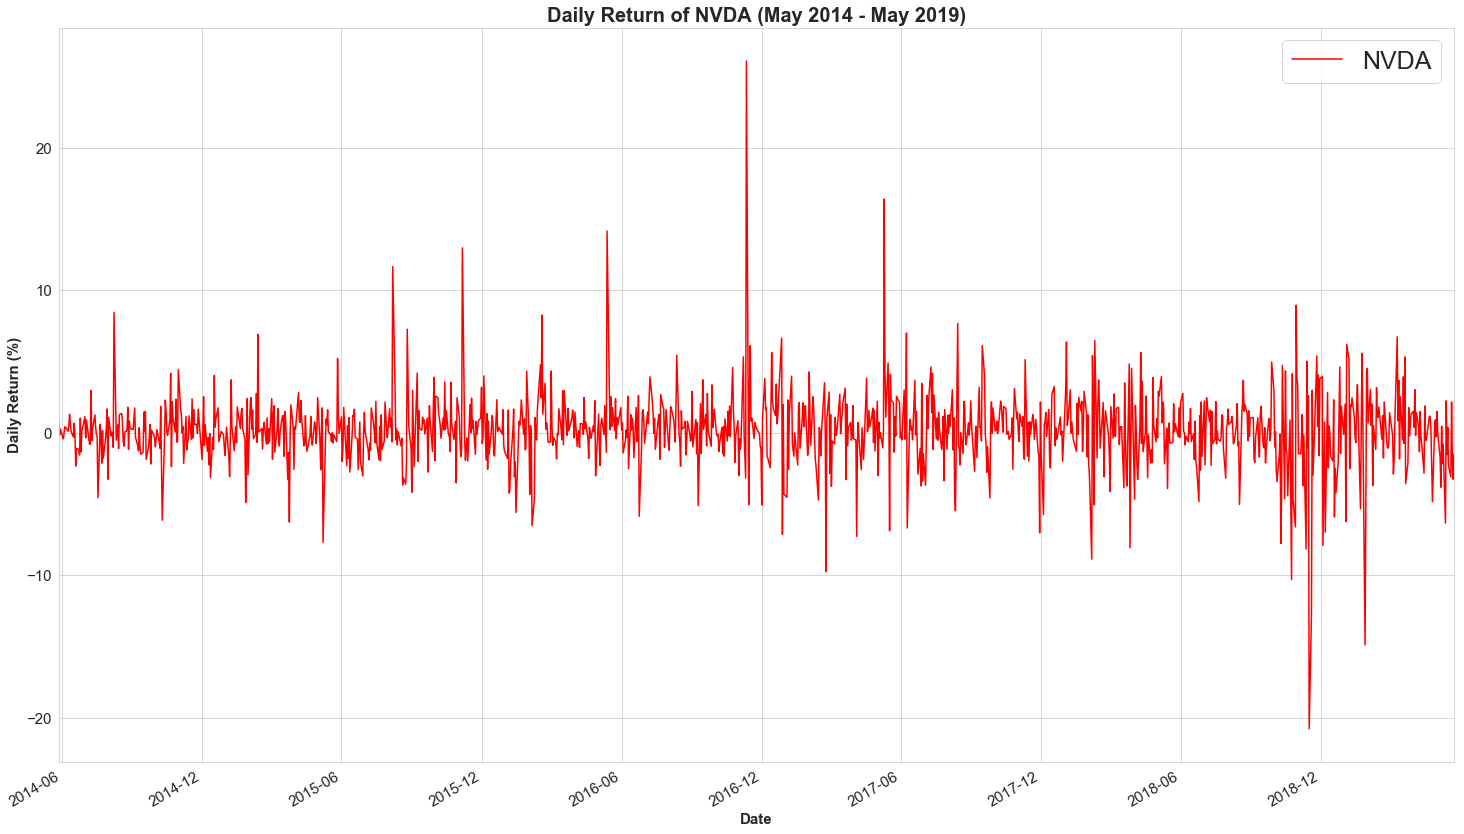

In [18]:
returns['NVDA'].plot(legend = True, figsize = (25,15), color = 'r', fontsize = 15)
plt.legend(prop={'size': 25})
plt.title('Daily Return of NVDA (May 2014 - May 2019)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
#plt.savefig('Daily Return - NVDA.pdf')
plt.show()

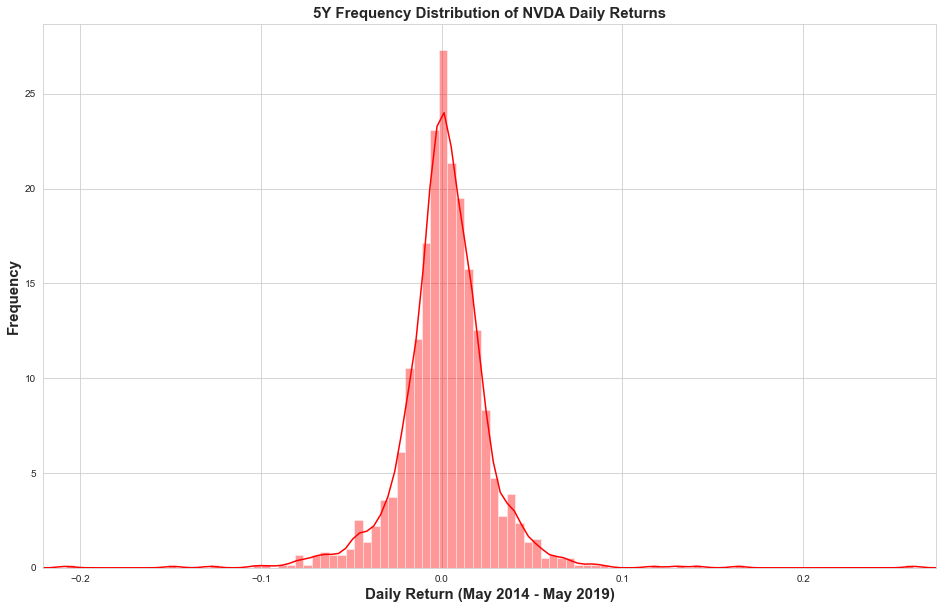

In [19]:
sns.distplot(rets['NVDA'].dropna(), bins = 100, color = 'r')
plt.title('5Y Frequency Distribution of NVDA Daily Returns', fontsize = 15, weight = 'bold')
plt.xlabel('Daily Return (May 2014 - May 2019)', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.margins(x = 0)
#plt.savefig('NVDA Frequency Distribution Plot.pdf')
plt.show()

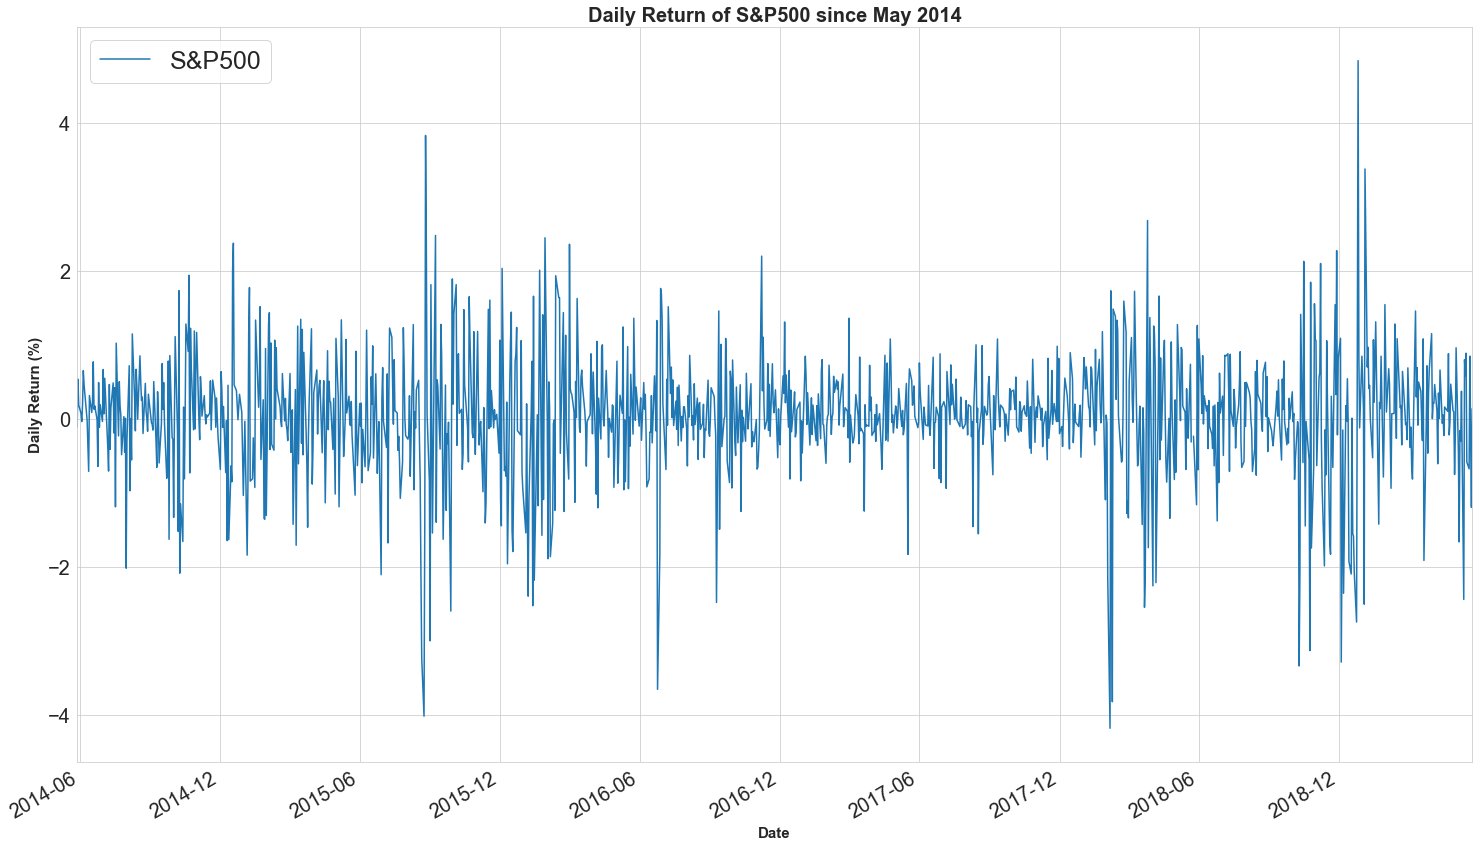

In [20]:
returns['S&P500'].plot(legend = True, figsize = (25,15), fontsize = 20)
plt.legend(prop={'size': 25})
plt.title('Daily Return of S&P500 since May 2014', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
#plt.savefig('Daily Return - S&P500.pdf')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

# Annual Stock Returns

In [21]:
#Annual Return
avg_returns = returns.mean()*250
i =  avg_returns['INTC']
a = avg_returns['AMD']
n = avg_returns['NVDA']
s = avg_returns['S&P500']

In [22]:
print('Average Annual Return of INTC since May 2014: ' + str(round(i, 2))+ '%')
print('Average Annual Return of AMD since May 2014: ' + str(round(a, 2))+ '%')
print('Average Annual Return of NVDA since May 2014: ' + str(round(n, 2))+ '%')
print('Average Annual Return of S&P500 since May 2014: ' + str(round(s, 2))+ '%')

Average Annual Return of INTC since May 2014: 12.97%
Average Annual Return of AMD since May 2014: 37.33%
Average Annual Return of NVDA since May 2014: 41.44%
Average Annual Return of S&P500 since May 2014: 7.75%


In [23]:
#Variance (Risk)
ir = rets['INTC'].std()*250**0.5
ar = rets['AMD'].std()*250**0.5
nr = rets['NVDA'].std()*250**0.5
sr = rets['S&P500'].std()*250**0.5

In [24]:
print('Average Annual Risk Associated with INTC since May 2014: ' + str(round(ir, 2))+ '%')
print('Average Annual Risk Associated with AMD since May 2014: ' + str(round(ar, 2))+ '%')
print('Average Annual Risk Associated with NVDA since May 2014: ' + str(round(nr, 2))+ '%')
print('Average Annual Risk Associated with S&P500 since May 2014: ' + str(round(sr, 2))+ '%')

Average Annual Risk Associated with INTC since May 2014: 0.26%
Average Annual Risk Associated with AMD since May 2014: 0.62%
Average Annual Risk Associated with NVDA since May 2014: 0.41%
Average Annual Risk Associated with S&P500 since May 2014: 0.13%


--------------------------------------------------------------------------------------------------------------------------------

# Covariance
> Value = 0: Securities are independent
>>  Value > 0: Securities trend in the same direction
>>>  Value < 0: Securities trend in the opposite direction

In [25]:
#Covariance
cov_matrix = rets.cov()*250
cov_matrix

INTC       AMD      NVDA    S&P500
INTC    0.066051  0.046654  0.048110  0.021585
AMD     0.046654  0.382928  0.113463  0.030694
NVDA    0.048110  0.113463  0.169290  0.028256
S&P500  0.021585  0.030694  0.028256  0.017674

---------------------------------------------------------------------------------------------------------------------------------

# Correlation
> Value > 0: Securities have a positive stock price relationship (A $ \uparrow $, B $ \uparrow $)
>> Value < 0: Securities have an inverse stock price relationship (A $ \uparrow $, B $ \downarrow $)

In [26]:
#Correlation
corr_matrix = rets.corr()
corr_matrix

INTC       AMD      NVDA    S&P500
INTC    1.000000  0.293353  0.454970  0.631489
AMD     0.293353  1.000000  0.445637  0.372854
NVDA    0.454970  0.445637  1.000000  0.516266
S&P500  0.631489  0.372854  0.516266  1.000000

In [27]:
change = data.pct_change()

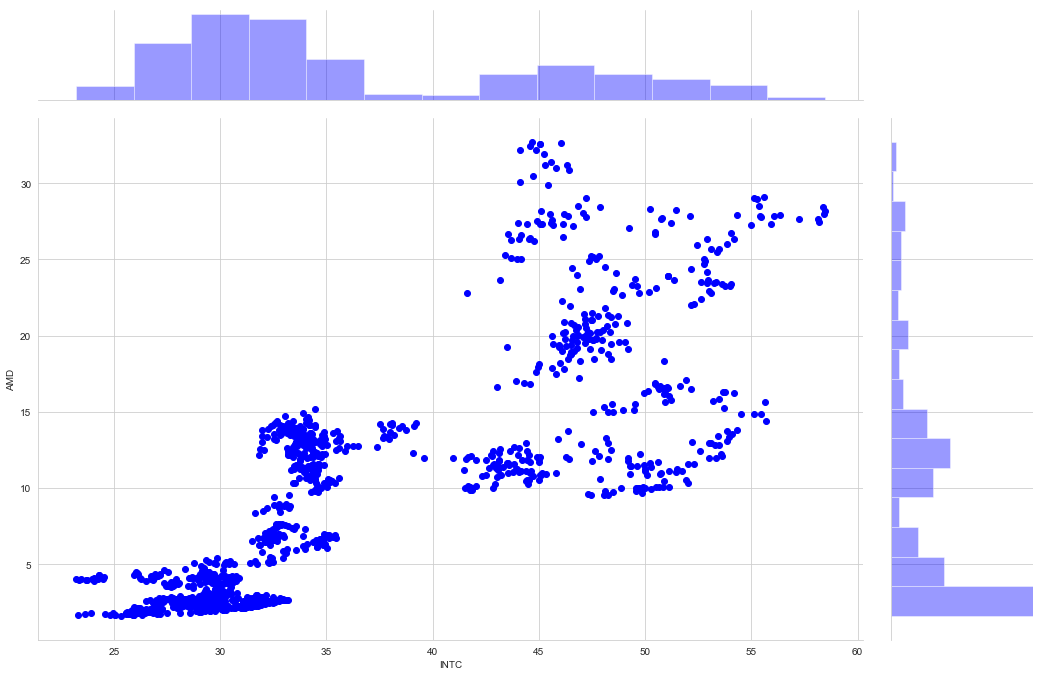

In [28]:
#Correlation Plot
sns.jointplot(data['INTC'], data['AMD'], change, kind = 'scatter', color = 'b')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.margins(x = 0)
#plt.savefig('INTC-AMD Correlation Plot.pdf')
plt.show()

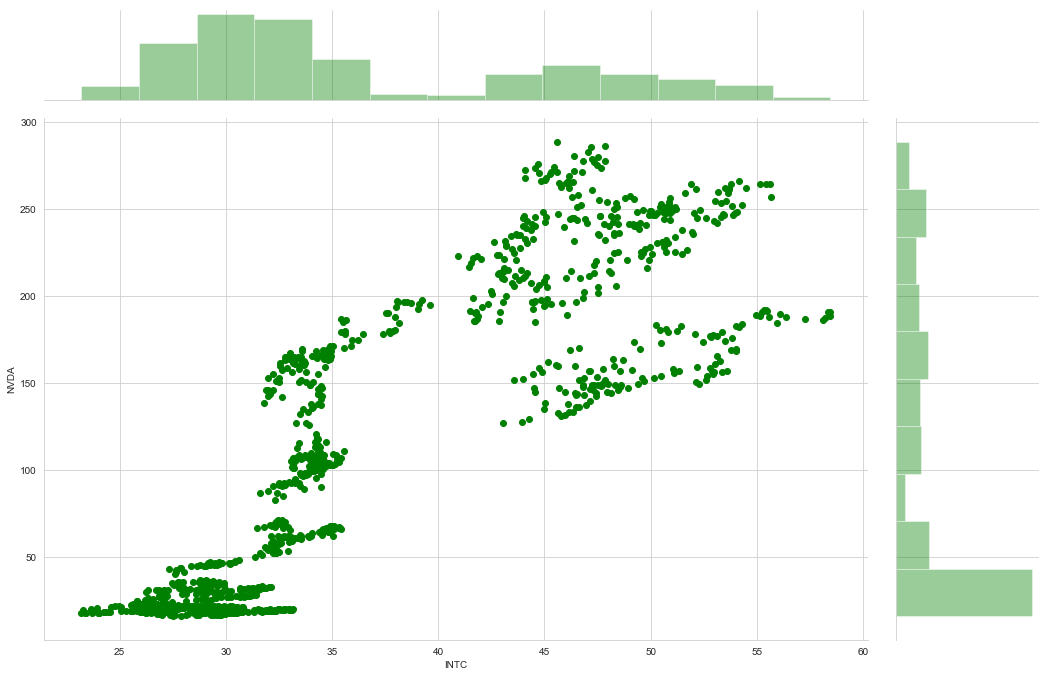

In [29]:
sns.jointplot(data['INTC'], data['NVDA'], change, kind = 'scatter', color = 'g')
fig = plt.gcf()
fig.set_size_inches(16, 10)
#plt.savefig('INTC-NVDA Correlation Plot.pdf')
plt.show()

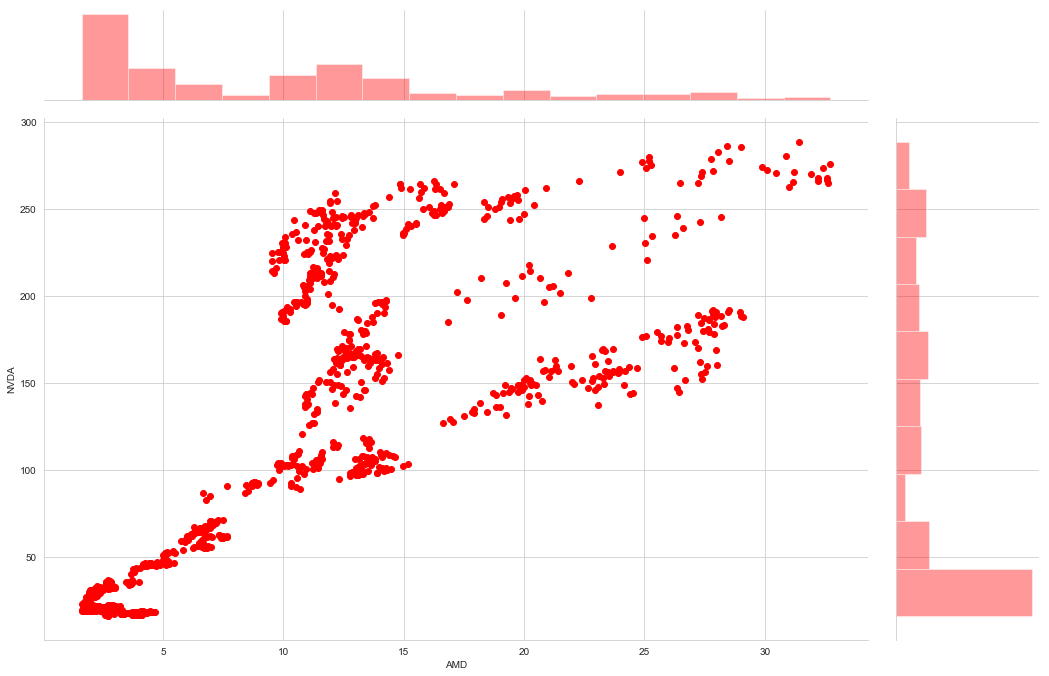

In [30]:
sns.jointplot(data['AMD'], data['NVDA'], change, kind = 'scatter', color = 'r')
fig = plt.gcf()
fig.set_size_inches(16, 10)
#plt.savefig('AMD-NVDA Correlation Plot.pdf')
plt.show()

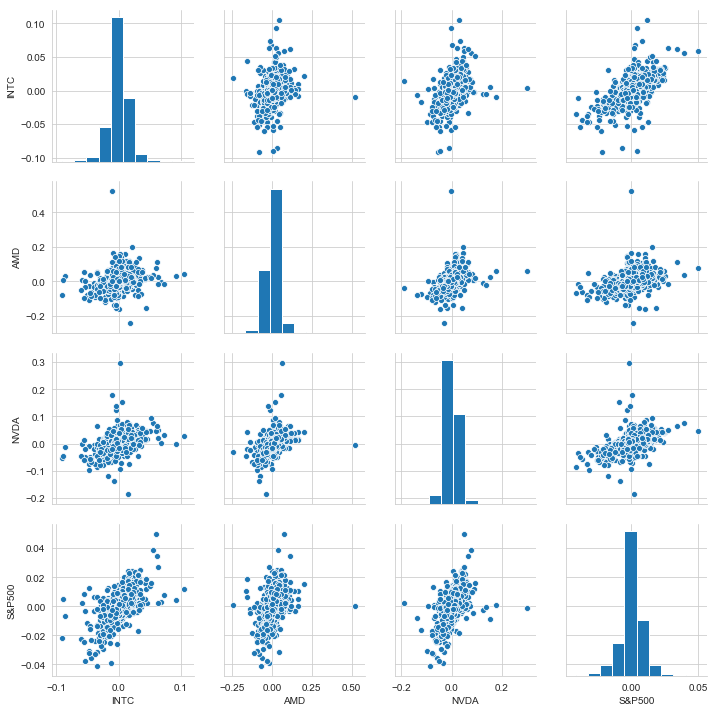

In [31]:
sns.pairplot(change.dropna())
#plt.savefig('Correlation PairPlot.pdf')

---------------------------------------------------------------------------------------------------------------------------------

# Expected Daily Return v Risk

In [32]:
change.head()

INTC       AMD      NVDA    S&P500
Date                                              
2014-05-27       NaN       NaN       NaN       NaN
2014-05-28  0.006363 -0.009901  0.008498 -0.001114
2014-05-29  0.002980  0.007500 -0.001577  0.005367
2014-05-30  0.013351 -0.007444  0.002637  0.001844
2014-06-02 -0.002195 -0.007500 -0.003157  0.000728

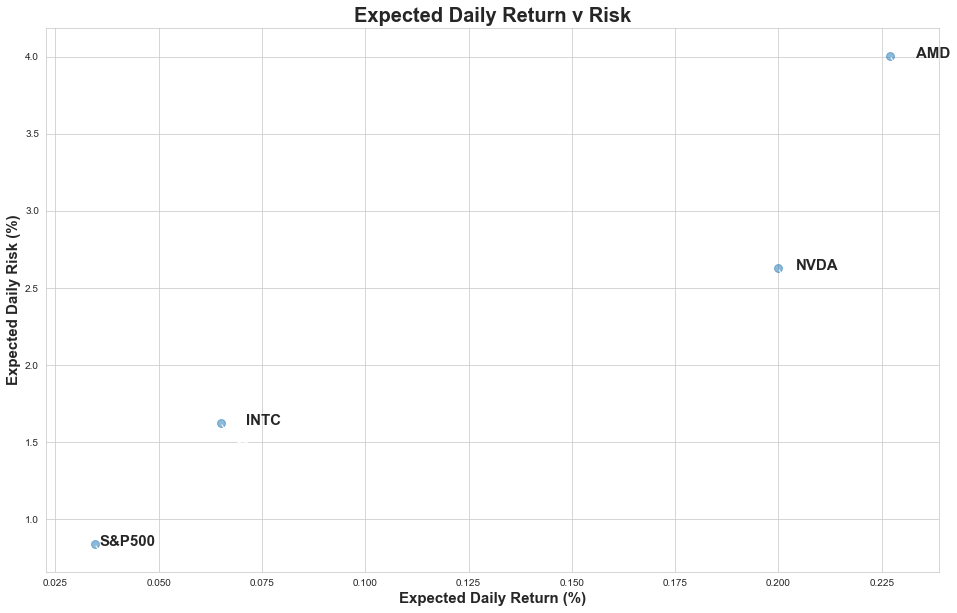

In [33]:
change1 = (change.dropna())*100

area = np.pi*20

plt.scatter(change1.mean(), change1.std(), alpha = 0.5, s = area)
plt.title('Expected Daily Return v Risk', fontsize = 20, weight = 'bold')
plt.xlabel('Expected Daily Return (%)', fontsize = 15, weight = 'bold')
plt.ylabel('Expected Daily Risk (%)', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.margins(x = 0)
#plt.savefig('Combined Expected Risk-Return Plot.pdf')

for label, x, y in zip(change1.columns, change1.mean(), change1.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60 ,-5),
        textcoords = 'offset points', ha = 'right', va = 'bottom', weight = 'bold', fontsize = 15,
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-1'))

---------------------------------------------------------------------------------------------------------------------------------

# Beta 
> $\Large \beta_i =  \frac {\sigma_{(r_i, r_m)}}{\sigma^2_{(r_m)}} $


$\boldsymbol\beta_i $ = Beta of stock i

$\boldsymbol{\sigma_{(r_i, r_m)}} $ = Covariance between stock i returns & market returns

$\boldsymbol{\sigma^2_{(r_m)}} $ = Variance of market returns

In [34]:
#Beta
i_mark = data[['INTC', 'S&P500']]
i_mark.tail(3)

INTC      S&P500
Date                         
2019-05-22  44.00  2856.27002
2019-05-23  44.53  2822.23999
2019-05-24  44.57  2826.06000

In [35]:
i_returns = np.log(i_mark/i_mark.shift(1))
(i_returns.head(3))*100

INTC    S&P500
Date                          
2014-05-27       NaN       NaN
2014-05-28  0.634326 -0.111469
2014-05-29  0.297521  0.535276

In [36]:
i_cov = i_returns.cov()*250
i_cov

INTC    S&P500
INTC    0.066051  0.021585
S&P500  0.021585  0.017674

In [37]:
i_cov_mark = i_cov.iloc[0,1]
i_cov_mark

0.021585089156533913

In [38]:
mark_var = rets['S&P500'].var()*250
mark_var

0.01767432635437606

In [39]:
i_beta = i_cov_mark/mark_var
i_beta

1.2212679976450458

In [40]:
a_mark = data[['AMD', 'S&P500']]
a_mark.head(2)

AMD       S&P500
Date                         
2014-05-27  4.04  1911.910034
2014-05-28  4.00  1909.780029

In [41]:
a_returns = np.log(a_mark/a_mark.shift(1))
(a_returns.head(3))*100

AMD    S&P500
Date                          
2014-05-27       NaN       NaN
2014-05-28 -0.995033 -0.111469
2014-05-29  0.747201  0.535276

In [42]:
a_cov = a_returns.cov()*250
a_cov

AMD    S&P500
AMD     0.382928  0.030694
S&P500  0.030694  0.017674

In [43]:
a_cov_mark = a_cov.iloc[0,1]
a_cov_mark

0.030694011907733514

In [44]:
a_beta = a_cov_mark/mark_var
a_beta

1.7366439485335097

In [45]:
n_mark = data[['NVDA', 'S&P500']]
n_mark.tail(2)

NVDA      S&P500
Date                          
2019-05-23  147.32  2822.23999
2019-05-24  145.15  2826.06000

In [46]:
n_returns = np.log(n_mark/n_mark.shift(1))
(n_returns.head(3))*100

NVDA    S&P500
Date                          
2014-05-27       NaN       NaN
2014-05-28  0.846174 -0.111469
2014-05-29 -0.157872  0.535276

In [47]:
n_cov = n_returns.cov()*250
n_cov

NVDA    S&P500
NVDA    0.169290  0.028256
S&P500  0.028256  0.017674

In [48]:
n_cov_mark = n_cov.iloc[0,1]
n_cov_mark

0.02825642895284657

In [49]:
n_beta = n_cov_mark/mark_var
n_beta

1.5987273509776763

In [50]:
print('5Y Beta of INTC Relative to S&P500: ' + str(round(i_beta,2)))
print('5Y Beta of AMD Relative to S&P500: ' + str(round(a_beta,2)))
print('5Y Beta of NVDA Relative to S&P500: ' + str(round(n_beta,2)))

5Y Beta of INTC Relative to S&P500: 1.22
5Y Beta of AMD Relative to S&P500: 1.74
5Y Beta of NVDA Relative to S&P500: 1.6


--------------------------------------------------------------------------------------------------------------------------------

# Expected Equity Returns (CAPM)
> Expected Return = Risk-Free Rate + $ \beta $ $ \cdot $ (Equity-Risk Premium)
 >> Risk-Free Rate = 2.3240% (US 10Y Treasury Bond Yield - 24/05/2019)
  >>> Equity Risk Premium = 5% (Consensus Value)
  

In [51]:
rfr = 0.023240
erp = 0.05

In [52]:
i_r = rfr + i_beta*erp
i_er = (i_r)*100
i_er

8.430339988225228

In [53]:
a_r = rfr + a_beta*erp
a_er = (a_r)*100
a_er

11.007219742667548

In [54]:
n_r = rfr + n_beta*erp
n_er = (n_r)*100
n_er

10.317636754888381

In [55]:
print('Expected 5Y Return of INTC: ' + str(round(i_er, 2)) + '%')
print('Expected 5Y Return of AMD: ' + str(round(a_er, 2)) + '%')
print('Expected 5Y Return of NVDA: ' + str(round(n_er, 2)) + '%')

Expected 5Y Return of INTC: 8.43%
Expected 5Y Return of AMD: 11.01%
Expected 5Y Return of NVDA: 10.32%


--------------------------------------------------------------------------------------------------------------------------------

# Sharpe Ratios
$ \normalsize $
>  $ \Large Ratio $ $\Large =  $ $ \frac {\Large Equity\: Expected\: Return\: -\: Risk-Free\: Rate}{\Large Equity\: Standard\: Deviation} $ 

In [56]:
i_sr = (i_r - rfr)/(ir)
i_sr

0.23759743677015738

In [57]:
a_sr = (a_r - rfr)/(ar)
a_sr

0.1403208542626147

In [58]:
n_sr = (n_r - rfr)/(nr)
n_sr

0.19428024451867762

In [59]:
print('Expected Return of INTC Relative to Risk: ' + str(round(i_sr,2)*100) + '%')
print('Expected Return of AMD Relative to Risk: ' + str(round(a_sr, 5)*100) + '%')
print('Expected Return of NVDA Relative to Risk: ' + str(round(n_sr,2)*100) + '%')

Expected Return of INTC Relative to Risk: 24.0%
Expected Return of AMD Relative to Risk: 14.032%
Expected Return of NVDA Relative to Risk: 19.0%


--------------------------------------------------------------------------------------------------------------------------------

# Forecasting Stock Prices
> $ \Large Monte\: Carlo\: Process: ΔS=S \cdot (μΔt\:+\:  σ \cdot \epsilon\sqrtΔt) $


**S** = Stock Price


**t** = Time in Days

$\boldsymbol\mu$    = Mean Daily Return 


$\boldsymbol\sigma $ = Standard Deviation of Daily Returns

$\boldsymbol\epsilon $ = Normal Random Variable

$\boldsymbol {\mu\Delta_t} $ = Drift

$\boldsymbol {\sigma\epsilon\sqrt{\Delta_t}} $ = Shock

In [60]:
#Method #1
days = 250
dt = 1/days

i_mu = rets['INTC'].mean()
i_sigma = rets['INTC'].std()

def i_preds(start, days, i_mu, i_sigma):
    price = np.zeros(days)
    price[0] = start
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
            shock[x] = np.random.normal(loc = i_mu*dt, scale = i_sigma * np.sqrt(dt))
            drift[x] = i_mu*dt
            price[x] = price[x-1] + (price[x-1] * (drift[x-1] + shock[x]))
                                     
    return price

In [61]:
start = data['INTC'].iloc[-1]
start

44.57

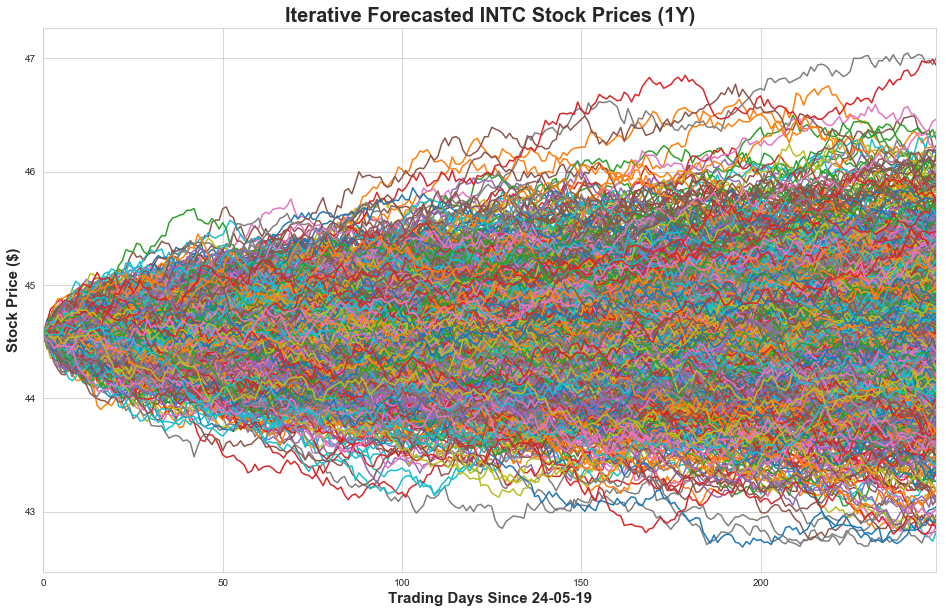

In [62]:
for run in range(1000):
    plt.plot(i_preds(start, days, i_mu, i_sigma))

plt.title('Iterative Forecasted INTC Stock Prices (1Y)', fontsize = 20, weight = 'bold')
plt.xlabel('Trading Days Since 24-05-19', fontsize = 15, weight = 'bold')
plt.ylabel('Stock Price ($)', fontsize = 15, weight = 'bold')
plt.margins(x = 0)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [63]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = i_preds(start, days, i_mu, i_sigma)[days - 1]

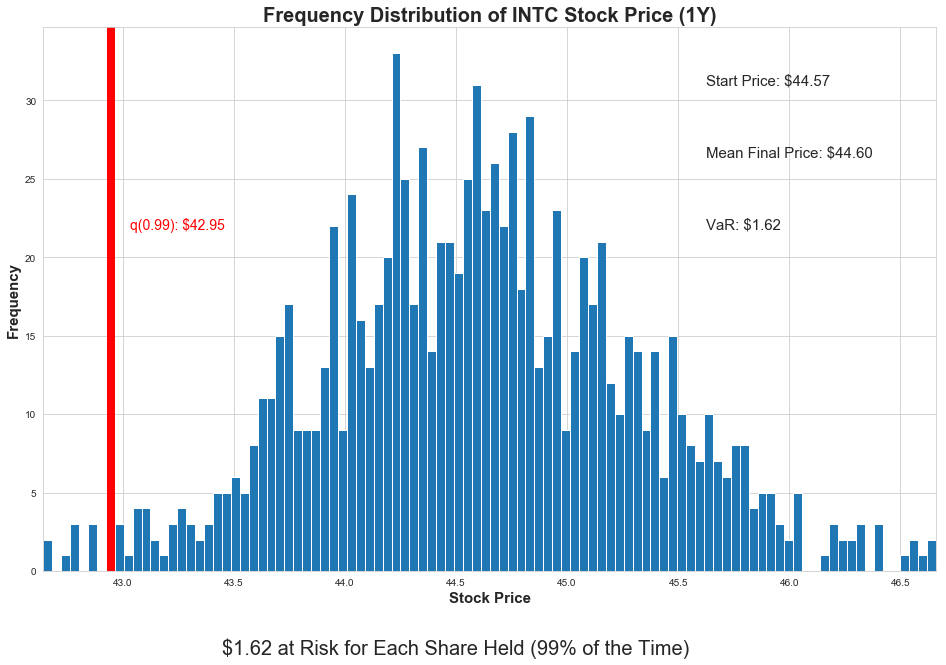

In [86]:
q =  np.percentile(simulations, 1)

plt.hist(simulations, bins = 100)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.margins(x = 0)
plt.axvline(x = q, color = 'r', linewidth = 8)
plt.title('Frequency Distribution of INTC Stock Price (1Y)', fontsize = 20, weight = 'bold')
plt.xlabel('Stock Price', fontsize = 15, weight = 'bold')
plt.ylabel('Frequency', fontsize = 15, weight = 'bold')
plt.figtext(0.70, 0.8, s = 'Start Price: $%.2f' %start, fontsize = 15)
plt.figtext(0.70, 0.7, 'Mean Final Price: $%.2f' %simulations.mean(), fontsize = 15)
plt.figtext(0.2, 0.6, 'q(0.99): $%.2f' %q, fontsize = 14, color = 'r')
plt.figtext(0.70,0.6, 'VaR: $%.2f' %(start - q), fontsize = 15 )
plt.figtext(0.28, 0.01, '$1.62 at Risk for Each Share Held (99% of the Time)', horizontalalignment='left', 
            fontsize = 20)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

$\Large P_t  =  \ P_{t-1}   \cdot    \ e^r $
>  r = log return of share price between yesterday & today = $\Large \ ln(\frac {P_t}{P_{t-1}}) $

In [65]:
#Method #2
i_mu

0.0005186353731036217

In [66]:
i_var = rets['INTC'].var()
i_var

0.0002642034300484444

In [67]:
drift = i_mu - (0.5*i_var)
drift

0.0003865336580793995

In [68]:
i_sdev =  rets['INTC'].std()
i_sdev

0.016254335730765634

In [69]:
np.array(drift)

array(0.00038653)

In [70]:
x = np.random.rand(10,2)

In [71]:
norm.ppf(x)

array([[ 0.00423503, -1.22789694],
       [-0.46132617, -1.37770933],
       [ 0.94980386,  0.1741241 ],
       [ 0.47128329,  1.45154736],
       [ 0.94193966, -0.9957854 ],
       [ 1.80476115,  1.1000266 ],
       [ 0.64690353,  0.54916722],
       [-0.8668643 ,  0.38217566],
       [ 1.46398338,  0.07975352],
       [ 0.51926565, -0.33127681]])

In [72]:
z = norm.ppf(np.random.rand(10,2))             #Random variable = epsilon
z

array([[-1.96618605, -0.30446072],
       [ 0.11306005,  2.14231475],
       [-0.07194198, -2.52579045],
       [-0.75395157,  0.24128053],
       [ 1.00642123, -0.31285751],
       [-0.48365688,  0.41998331],
       [ 0.87047171,  1.3830409 ],
       [-1.85177461,  0.27542197],
       [ 0.5249907 , -0.47330949],
       [-1.32956399, -0.54642473]])

In [73]:
intervals = 250
iterations = 1000

In [74]:
daily_rs = np.exp(drift + i_sdev*norm.ppf(np.random.rand(intervals,iterations)))

In [75]:
daily_rets = daily_rs - 1
daily_rets

array([[ 0.01908696,  0.00525384,  0.02144005, ..., -0.00883833,
        -0.0104648 ,  0.0006097 ],
       [-0.01395642, -0.0310412 ,  0.03129408, ...,  0.01446114,
        -0.00078497, -0.02725418],
       [-0.00483038, -0.02119455,  0.02152175, ...,  0.02040612,
        -0.02161901, -0.00989025],
       ...,
       [ 0.02223587, -0.00499393,  0.00132429, ..., -0.00961535,
         0.00992064, -0.01483275],
       [-0.01852994, -0.02084163, -0.01437439, ..., -0.00954742,
         0.04263555, -0.00493792],
       [ 0.01891775, -0.00624784,  0.01631288, ...,  0.01737   ,
         0.01308015, -0.00827852]])

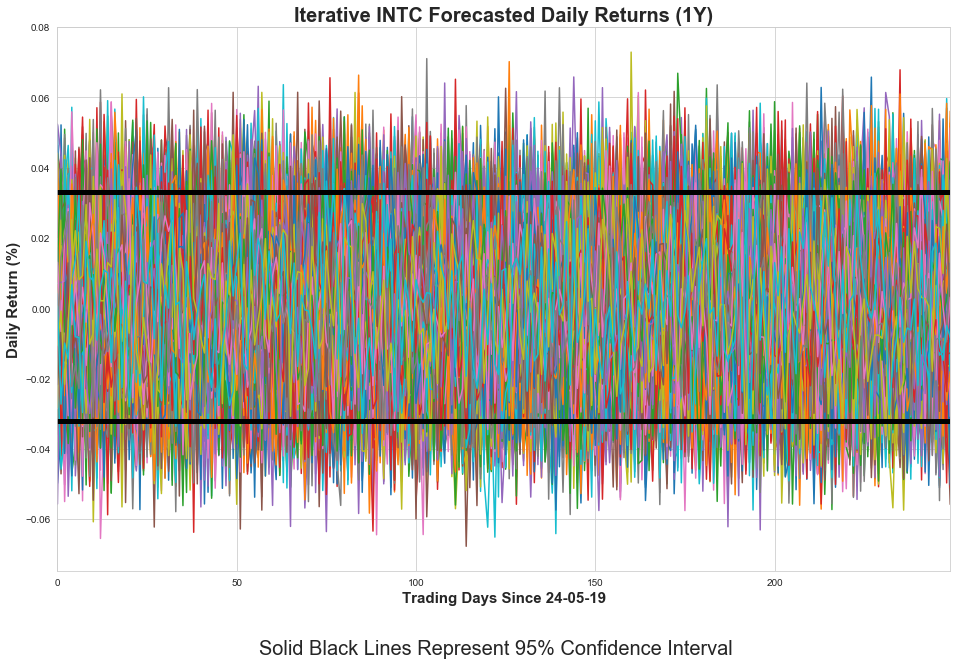

In [76]:
plt.plot(daily_rets) 
plt.title('Iterative INTC Forecasted Daily Returns (1Y)', fontsize = 20, weight = 'bold')
plt.xlabel('Trading Days Since 24-05-19', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return (%)', fontsize = 15, weight = 'bold')
plt.axhline(y = daily_rets.mean() + 2*daily_rets.std(), color = 'black', linewidth = 5)
plt.axhline(y = daily_rets.mean() - 2*daily_rets.std(), color = 'black', linewidth = 5)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.margins(x = 0)
plt.figtext(0.3, 0.01, 'Solid Black Lines Represent 95% Confidence Interval', horizontalalignment='left', 
            fontsize = 20)
plt.show()

In [77]:
i_orig = data['INTC'].iloc[-1]
i_orig

44.57

In [78]:
price = np.zeros_like(daily_rets)
price

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
price[0] = i_orig
price

array([[44.57, 44.57, 44.57, ..., 44.57, 44.57, 44.57],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [80]:
for t in range(1, intervals):
    price[t] = price[t-1]*daily_rs[t]

In [81]:
price

array([[44.57      , 44.57      , 44.57      , ..., 44.57      ,
        44.57      , 44.57      ],
       [43.94796218, 43.18649359, 45.9647773 , ..., 45.21453289,
        44.53501386, 43.35528115],
       [43.73567691, 42.27117531, 46.95401958, ..., 46.13718608,
        43.57221084, 42.92648651],
       ...,
       [64.95926516, 56.32299049, 47.92357052, ..., 38.87362232,
        56.088992  , 54.22949197],
       [63.755574  , 55.14912752, 47.23469862, ..., 38.50247956,
        58.4803772 , 53.96171112],
       [64.96168589, 54.80456439, 48.00523254, ..., 39.17126782,
        59.24530926, 53.51498824]])

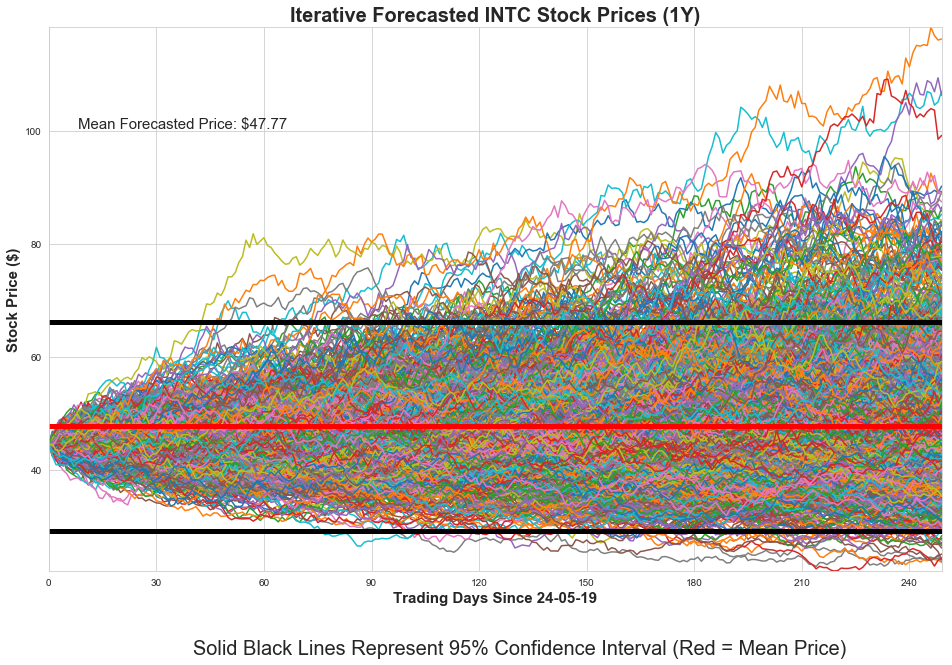

In [99]:
plt.plot(price)
plt.axhline(y = price.mean(), linewidth = 5, color = 'r')
plt.axhline(y = price.mean() + 2*price.std(), linewidth = 5, color = 'black')
plt.axhline(y = price.mean() - 2*price.std(), linewidth = 5, color = 'black')
plt.title('Iterative Forecasted INTC Stock Prices (1Y)', fontsize = 20, weight = 'bold')
plt.xlabel('Trading Days Since 24-05-19', fontsize = 15, weight = 'bold')
plt.ylabel('Stock Price ($)', fontsize = 15, weight = 'bold')
plt.figtext(0.15,0.74, 'Mean Forecasted Price: $%.2f' %price.mean(), fontsize = 15)
plt.xticks(np.arange(0,300, step = 30))
plt.yticks(np.arange(0,140, step = 20))
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.margins(x = 0, y = 0)
plt.figtext(0.25, 0.01, 'Solid Black Lines Represent 95% Confidence Interval (Red = Mean Price)', horizontalalignment='left', 
            fontsize = 20)
plt.show()

In [83]:
round(price.mean(), 2)

47.77

In [84]:
upper_i95 = price.mean() + 2*price.std()
round(upper_i95,2)

66.23

In [85]:
lower_i95 = price.mean() - 2*price.std()
round(lower_i95,2)

29.3